Scaling factor:  0.0002679597376874076
Max diff. lightshift:  -2679.597376874076


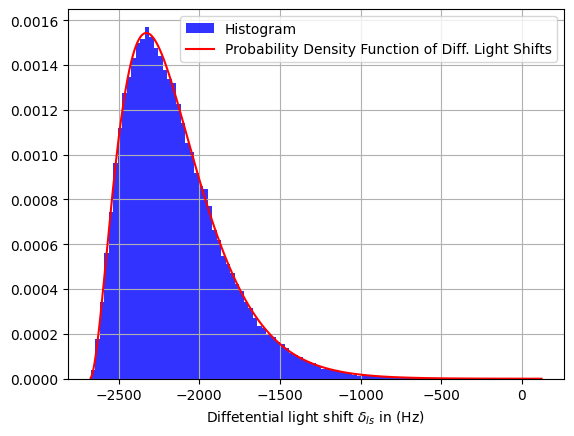

In [2]:
import numpy as np
import scipy.constants as sc
from scipy.stats import gamma
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 

#Define laser frequency and detunings

tweezerfrequency =356 #THz for 840 nm trapping light
deltaP=384.23-377.11#difference between D1 and D2 lines in THz 
deltat=377.11- tweezerfrequency#difference between D1 and tweezer frequency in THz 

delta_eff=((2/(deltaP+deltat)+1/deltat)/3)**-1 #THz Beugnon's thesis page 34 (effective detuning from weighted average of D1 and D2 lines)
whfs=6.8*1e-3
eta= whfs/delta_eff #scaling factor
print("Scaling factor: ", eta)

N=100000
U0= 10*1e6 # trap depth in Hz 
delta_0=-eta*U0 #differential light shift at the trap bottom

print("Max diff. lightshift: ",delta_0)
alpha=3
T=10*1e-6 #atom temperature in Kelvin
K = 2*sc.hbar/(T*sc.k*eta) #parameter from Analysis of dephasing mechanisms in a standing wave dipole trap (Kurh et al.)
theta = 1/K

#Define gamma distribution parameters for Maxwell-Boltzmann
sample = gamma.rvs(a=alpha, scale=theta, size=N) 
sample_final = (sample + delta_0)


plt.hist(sample_final, bins=100, density=True, alpha=0.8, color='b', label='Histogram')

x = np.linspace(min(sample_final), max(sample_final), N)
pdf = gamma.pdf(x-delta_0, a=alpha, scale=theta) #Probability density function
plt.plot(x, pdf, 'r', label='Probability Density Function of Diff. Light Shifts')

plt.xlabel(r"Diffetential light shift $\delta_{ls}$ in (Hz) ")
plt.legend()

plt.grid(True)
plt.show()
